Import necessary packages

In [304]:
import pandas as pd
import psycopg2
from psycopg2 import Error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Establish connections to the database

In [272]:
try:
    # Connect to an existing database
    connection = psycopg2.connect(database="2022-everything-team12", 
                            user='ycj6475', 
                            password='White001!', 
                            host='pg.analytics.northwestern.edu', 
                            port= '5432')

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
df = pd.read_sql("select * from \"aggtrnsact\"", connection);
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 


You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



/opt/homebrew/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


PostgreSQL connection is closed


In [306]:
#--------------------
df['totalprofit']
df['totalprofit'][df['totalprofit']<0] = 0

#--------------------
# check null value counts
df.notnull().sum()

/var/folders/5_/39stv43d5_70psn53dfmjwt00000gn/T/ipykernel_64259/3668881504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['totalprofit'][df['totalprofit']<0] = 0


saledate              11281
state                 11281
nsku                  11281
totalquantity         11281
avgquantity           11281
totalamt              11281
avgamt                11281
minamt                11281
maxamt                11281
totalorigprice        11281
avgorigprice          11281
minorigprice          11281
maxorigprice          11281
totalretail           11281
avgretail             11281
minretail             11281
maxretail             11281
avgretailtrnsact      11281
totalcost             11281
avgcost               11281
mincost               11281
maxcost               11281
avgcosttrnsact        11281
totaldiscount         11281
avgdiscounttrnsact    11281
mindiscount           11281
maxdiscount           11281
totalprofit           11281
avgprofittrnsact      11281
minprofit             11281
maxprofit             11281
nstore                11281
ncities               11281
ndept                 11281
nvendors              11281
avgvendorsstore     

check the shape of total revenue column, no trend oe seasonality found

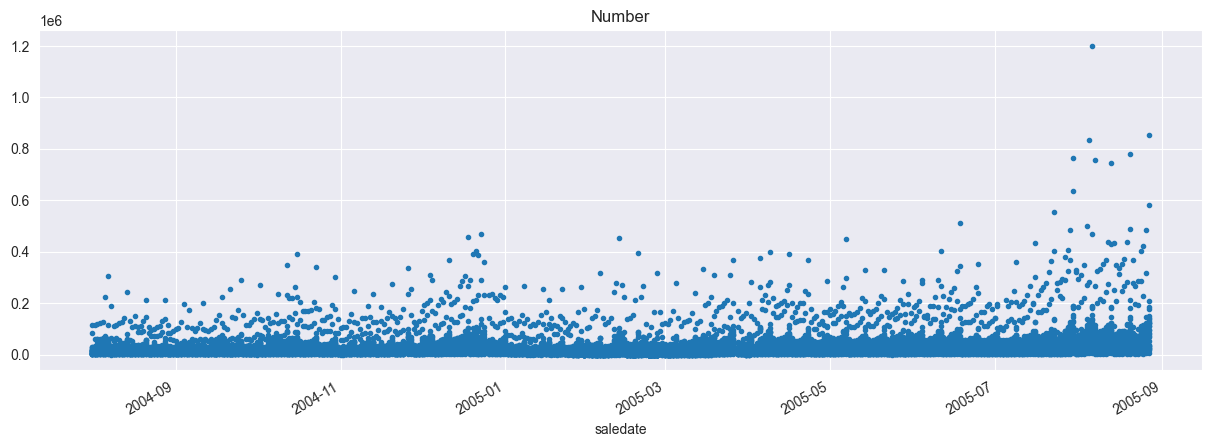

In [307]:
df_groupyed = df
color_pal = sns.color_palette()
# set df index as date
df_ts = df_groupyed.set_index('saledate')
df_ts.index = pd.to_datetime(df_ts.index)
# check distribution of revenue (no pattern found)
df_ts_draw = df_ts["totalprofit"]
df_ts_draw.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Number')
plt.show()


In [308]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofmonth'] = df.index.day
    return df

# create time series features
df_ts = create_features(df_ts)
df_ts

,state,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,avgorigprice,...,ncities,ndept,nvendors,avgvendorsstore,hour,dayofweek,quarter,month,year,dayofmonth
saledate,,,,,,,,,,,,,,,,,,,,,
2004-08-01,AL,4016,4832,61,154686.64,1983.162051,0.0,650.0,112570.29,23.296832,...,10,56,411,34,0,6,3,8,2004,1
2004-08-01,AR,2923,3692,46,124112.38,1571.042785,0.0,895.0,99210.52,26.871755,...,7,57,384,54,0,6,3,8,2004,1
2004-08-01,AZ,6710,9272,83,282876.15,2548.433784,0.0,650.0,226252.94,24.401741,...,10,58,449,32,0,6,3,8,2004,1
2004-08-01,CA,1054,1174,13,40297.12,457.921818,0.0,425.0,30868.73,26.293637,...,2,53,249,124,0,6,3,8,2004,1
2004-08-01,CO,4062,5295,56,165998.81,1784.933441,0.0,895.0,122559.93,23.146351,...,9,58,381,34,0,6,3,8,2004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-27,TN,19319,28464,121,1204982.36,5127.584511,0.0,788.0,578953.01,20.339833,...,10,60,586,41,0,5,3,8,2005,27
2005-08-27,TX,62545,156933,458,6627749.79,19379.385351,0.0,1200.0,3189055.04,20.321125,...,46,60,802,14,0,5,3,8,2005,27
2005-08-27,UT,8985,12166,76,422610.82,2657.929686,0.0,695.0,220702.78,18.140949,...,6,56,467,77,0,5,3,8,2005,27


In [309]:
orignal_features = list(df.columns)
orignal_features.remove('saledate')
orignal_features

['state',
 'nsku',
 'totalquantity',
 'avgquantity',
 'totalamt',
 'avgamt',
 'minamt',
 'maxamt',
 'totalorigprice',
 'avgorigprice',
 'minorigprice',
 'maxorigprice',
 'totalretail',
 'avgretail',
 'minretail',
 'maxretail',
 'avgretailtrnsact',
 'totalcost',
 'avgcost',
 'mincost',
 'maxcost',
 'avgcosttrnsact',
 'totaldiscount',
 'avgdiscounttrnsact',
 'mindiscount',
 'maxdiscount',
 'totalprofit',
 'avgprofittrnsact',
 'minprofit',
 'maxprofit',
 'nstore',
 'ncities',
 'ndept',
 'nvendors',
 'avgvendorsstore']

In [310]:
# TODO: add lags
def create_lag_feature(df, column):
    '''
    Create time lagging features
    '''
    df = df.copy()
    df[column + '_1'] = df[column].shift(1)
    df[column + '_2'] = df[column].shift(2)
    df[column + '_3'] = df[column].shift(3)
    df[column + '_4'] = df[column].shift(4)
    df[column + '_5'] = df[column].shift(5)
    df[column + '_6'] = df[column].shift(6)
    df[column + '_7'] = df[column].shift(7)
    df[column + '_14'] = df[column].shift(14)
    df[column + '_28'] = df[column].shift(28)
    return df

orignal_features = list(df.columns)
orignal_features.remove('saledate')
orignal_features.remove('state')

for col in orignal_features:
    df_ts = create_lag_feature(df_ts, col)


df_model = pd.DataFrame(columns = df_ts.columns)
for state in df_ts['state'].drop_duplicates().tolist():
    df_part = df_ts[df_ts['state']==state]
    for col in orignal_features:
        df_part = create_lag_feature(df_part, col)
    df_model = pd.concat([df_model, df_part])


df_model




,state,nsku,totalquantity,avgquantity,totalamt,avgamt,minamt,maxamt,totalorigprice,avgorigprice,...,nvendors_28,avgvendorsstore_1,avgvendorsstore_2,avgvendorsstore_3,avgvendorsstore_4,avgvendorsstore_5,avgvendorsstore_6,avgvendorsstore_7,avgvendorsstore_14,avgvendorsstore_28
2004-08-01,AL,4016,4832,61,154686.64,1983.162051,0.0,650.0,112570.29,23.296832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-02,AL,4539,5730,42,177630.18,1325.598358,0.0,595.0,130580.11,22.788850,...,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-03,AL,5165,6556,51,203399.34,1589.057344,0.0,595.0,147526.72,22.502550,...,NaN,35.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-04,AL,5008,6331,50,199944.96,1599.559680,0.0,595.0,142912.21,22.573402,...,NaN,36.0,35.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-05,AL,5285,6681,50,213268.97,1615.674015,0.0,695.0,149751.38,22.414516,...,NaN,37.0,36.0,35.0,34.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,WY,453,509,15,12950.74,404.710625,0.0,159.0,9171.74,18.019136,...,158.0,154.0,161.0,201.0,179.0,162.0,163.0,158.0,140.0,158.0
2005-08-24,WY,917,990,14,31830.29,461.308551,0.0,595.0,15217.16,15.370869,...,214.0,146.0,154.0,161.0,201.0,179.0,162.0,163.0,144.0,214.0
2005-08-25,WY,841,940,13,30399.62,434.280286,0.0,495.0,13918.61,14.807032,...,242.0,216.0,146.0,154.0,161.0,201.0,179.0,162.0,171.0,242.0
2005-08-26,WY,1098,1195,15,36792.64,477.826494,0.0,240.0,17990.24,15.054594,...,208.0,199.0,216.0,146.0,154.0,161.0,201.0,179.0,171.0,208.0


In [311]:
orignal_features.remove('totalprofit')
df_ts_lagged = df_model.drop(orignal_features, axis=1)
df_ts_lagged

,state,totalprofit,hour,dayofweek,quarter,month,year,dayofmonth,nsku_1,nsku_2,...,nvendors_28,avgvendorsstore_1,avgvendorsstore_2,avgvendorsstore_3,avgvendorsstore_4,avgvendorsstore_5,avgvendorsstore_6,avgvendorsstore_7,avgvendorsstore_14,avgvendorsstore_28
2004-08-01,AL,11758.40,0,6,3,8,2004,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-02,AL,15419.20,0,0,3,8,2004,2,4016.0,NaN,...,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-03,AL,15937.70,0,1,3,8,2004,3,4539.0,4016.0,...,NaN,35.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-04,AL,14726.50,0,2,3,8,2004,4,5165.0,4539.0,...,NaN,36.0,35.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-05,AL,15885.70,0,3,3,8,2004,5,5008.0,5165.0,...,NaN,37.0,36.0,35.0,34.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,WY,2881.74,0,1,3,8,2005,23,432.0,478.0,...,158.0,154.0,161.0,201.0,179.0,162.0,163.0,158.0,140.0,158.0
2005-08-24,WY,5055.26,0,2,3,8,2005,24,453.0,432.0,...,214.0,146.0,154.0,161.0,201.0,179.0,162.0,163.0,144.0,214.0
2005-08-25,WY,3755.03,0,3,3,8,2005,25,917.0,453.0,...,242.0,216.0,146.0,154.0,161.0,201.0,179.0,162.0,171.0,242.0
2005-08-26,WY,6096.00,0,4,3,8,2005,26,841.0,917.0,...,208.0,199.0,216.0,146.0,154.0,161.0,201.0,179.0,171.0,208.0


In [312]:
# one hot encoding for state variable
df_ts_lagged = pd.get_dummies(df_ts_lagged)
df_ts_lagged.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11281 entries, 2004-08-01 to 2005-08-27
Columns: 393 entries, totalprofit to dayofmonth_31
dtypes: float64(307), uint8(86)
memory usage: 27.4 MB


/opt/homebrew/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


# Modeling:

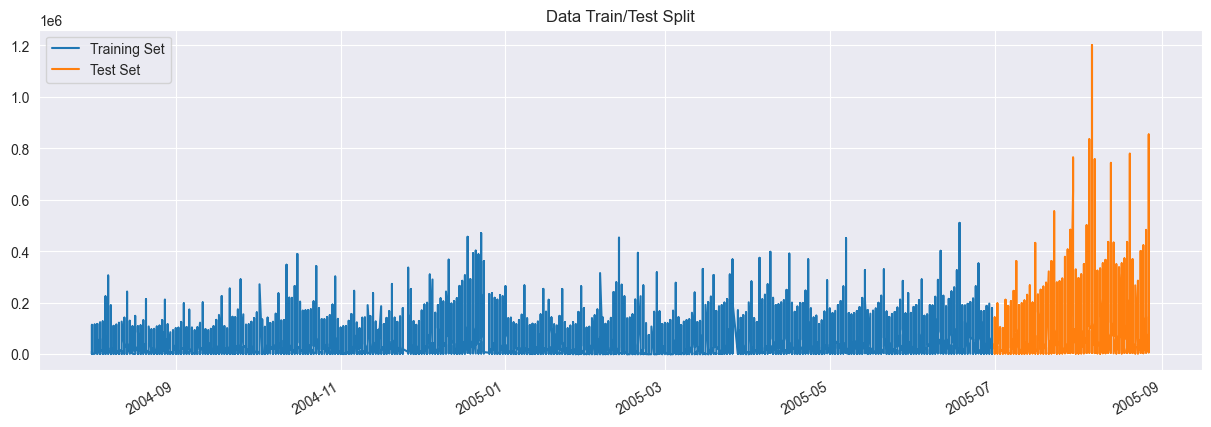

In [313]:
df_ts = df_ts_lagged

# train_test split
train = df_ts.loc[df_ts.index < '07-01-2005']
test = df_ts.loc[df_ts.index >= '07-01-2005']
# plot the train test dataset
train_ts_draw = train["totalprofit"]
test_ts_draw = test["totalprofit"]
fig, ax = plt.subplots(figsize=(15, 5))
train_ts_draw.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_ts_draw.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# Scaling Data

In [337]:
# split the data with labels
X_train = train.drop('totalprofit', axis = 1)
y_train = train['totalprofit']
X_test = test.drop('totalprofit', axis = 1)
y_test = test['totalprofit']

In [338]:
# standardlize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
standardX_train = sc.transform(X_train)
standardX_test = sc.transform(X_test)
X_Train_standardlized = pd.DataFrame(standardX_train, columns = list(X_train.columns))
X_Test_standardlized = pd.DataFrame(standardX_test, columns = list(X_test.columns))


In [339]:
# minmaxScale the data
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
mc.fit(X_train)
minMaxX_train = mc.transform(X_train)
minMaxX_test = mc.transform(X_test)
X_Train_minmax = pd.DataFrame(minMaxX_train, columns = list(X_train.columns))
X_Test_minmax = pd.DataFrame(minMaxX_test, columns = list(X_test.columns))


# XGboost Model

In [317]:
# do time series train test split
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [318]:
# tune the XGBoost model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.1,0.01,0.01],
           'n_estimators': [100, 500, 1000],
           }
xgbr = xgb.XGBRegressor(seed = 400)

clf = GridSearchCV(estimator=xgbr,
                   param_grid=params,
                   cv=cv,
                   scoring='neg_mean_squared_error',
                   verbose=1)
clf.fit(X_train, y_train,verbose=100)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    i...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.01],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [319]:
# use the tuned results to fit the xgboost regressor model
import xgboost as xgb
reg_tuned = clf.best_estimator_
reg_tuned.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:46937.21909	validation_1-rmse:100517.88089
[100]	validation_0-rmse:8126.85475	validation_1-rmse:37274.68650
[200]	validation_0-rmse:6427.63832	validation_1-rmse:36656.33657
[300]	validation_0-rmse:5430.16298	validation_1-rmse:36716.60081
[400]	validation_0-rmse:4787.43822	validation_1-rmse:36516.30203
[500]	validation_0-rmse:4284.79078	validation_1-rmse:36490.80581
[600]	validation_0-rmse:3883.21815	validation_1-rmse:36381.65947
[700]	validation_0-rmse:3565.54921	validation_1-rmse:36335.46002
[800]	validation_0-rmse:3275.50602	validation_1-rmse:36180.99892
[900]	validation_0-rmse:3039.45901	validation_1-rmse:36176.45905
[999]	validation_0-rmse:2838.07967	validation_1-rmse:36160.08137


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=400,
             reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

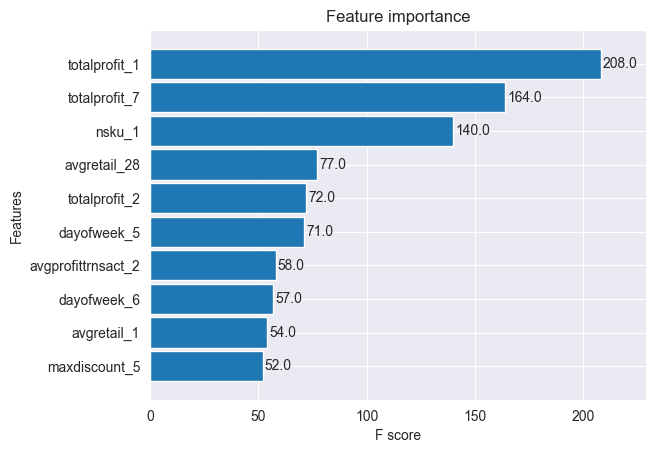

In [320]:
from xgboost import plot_importance, plot_tree
# get the variable importance of XGboost model
plot_importance(reg_tuned,max_num_features=10,height=0.9)



In [321]:
# do the prediction
y_pred = reg_tuned.predict(X_test)
X_test['prediction'] = y_pred
test_pred = pd.concat([X_test, X_train], sort=False)

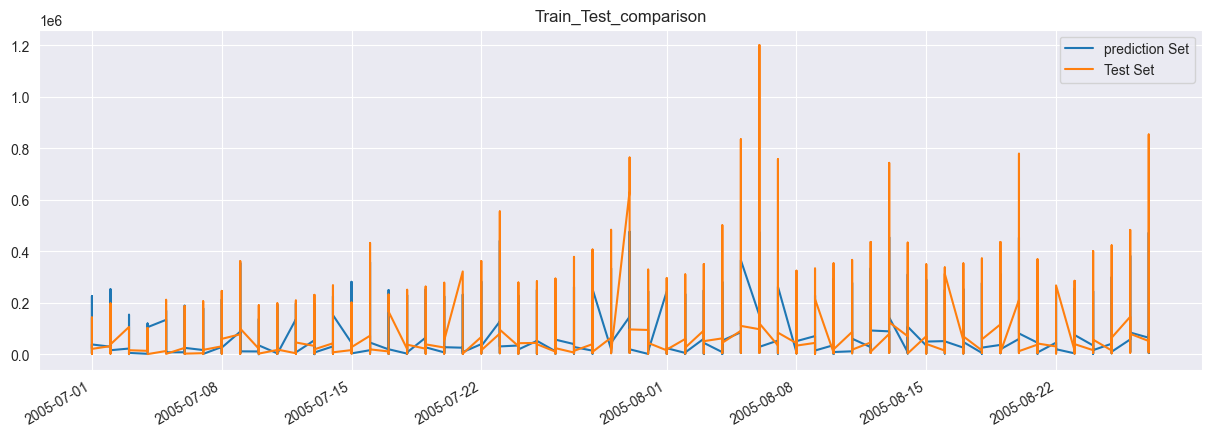

In [322]:
# graph the distribution of prediction vs actual
test_ts_draw = test["totalprofit"]
test_prediction = test_pred["prediction"]
fig, ax = plt.subplots(figsize=(15, 5))
test_prediction.plot(ax=ax, label='prediction Set', title='Train_Test_comparison')
test_ts_draw.plot(ax=ax, label='Test Set')
ax.legend(['prediction Set', 'Test Set'])
plt.show()

In [323]:
import sklearn.metrics as metrics
def show_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [324]:
show_results(y_test, y_pred)

explained_variance:  0.843
r2:  0.8344
MAE:  11080.207
MSE:  1307551479.2636
RMSE:  36160.0813


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[0]	validation_0-rmse:46937.21909	validation_1-rmse:100517.88089
[100]	validation_0-rmse:8126.85475	validation_1-rmse:37274.68650
[200]	validation_0-rmse:6427.63832	validation_1-rmse:36656.33657
[300]	validation_0-rmse:5430.16298	validation_1-rmse:36716.60081
[400]	validation_0-rmse:4787.43822	validation_1-rmse:36516.30203
[500]	validation_0-rmse:4284.79078	validation_1-rmse:36488.70440
[600]	validation_0-rmse:3883.21815	validation_1-rmse:36378.69115
[700]	validation_0-rmse:3565.54921	validation_1-rmse:36332.15941
[800]	validation_0-rmse:3275.50602	validation_1-rmse:36177.47064
[900]	validation_0-rmse:3039.45901	validation_1-rmse:36172.75872
[999]	validation_0-rmse:2838.07967	validation_1-rmse:36156.33949


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

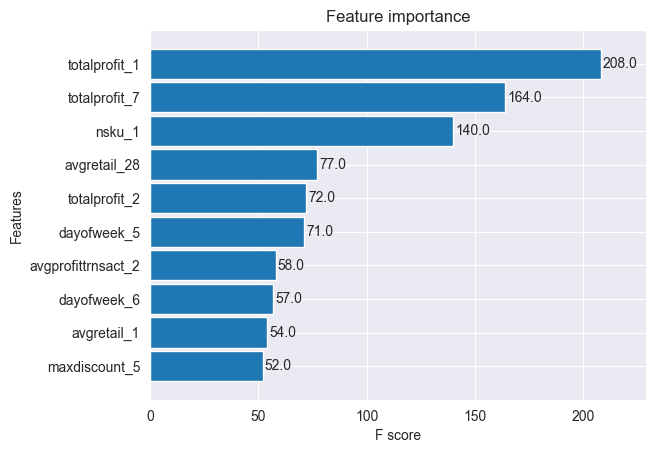

In [325]:
# training on the standardlized dataset
import xgboost as xgb
# tune the XGBoost model
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.1,0.01,0.001],
           'n_estimators': [100, 500, 1000],
           }
xgbr = xgb.XGBRegressor(seed = 400)
clf = GridSearchCV(estimator=xgbr,
                   param_grid=params,
                   scoring='neg_mean_squared_error',
                   verbose=1,
                   cv = cv)
clf.fit(X_Train_standardlized, y_train,verbose=100)

import xgboost as xgb
reg_tuned = clf.best_estimator_
reg_tuned.fit(X_Train_standardlized, y_train,
        eval_set=[(X_Train_standardlized, y_train), (X_Test_standardlized, y_test)],
        verbose=100)

from xgboost import plot_importance, plot_tree
# get the variable importance of XGboost model
plot_importance(reg_tuned,max_num_features=10,height=0.9)


In [326]:
X_Test_standardlized.head()


,nsku_1,nsku_2,nsku_3,nsku_4,nsku_5,nsku_6,nsku_7,nsku_14,nsku_28,totalquantity_1,...,dayofmonth_22,dayofmonth_23,dayofmonth_24,dayofmonth_25,dayofmonth_26,dayofmonth_27,dayofmonth_28,dayofmonth_29,dayofmonth_30,dayofmonth_31
0,0.218123,0.075340,-0.000593,-0.157121,-0.334842,0.597838,0.315459,0.331248,0.129821,0.032901,...,-0.185405,-0.185405,-0.185405,-0.167183,-0.185405,-0.176501,-0.185405,-0.176501,-0.176501,-0.135873
1,0.497973,0.217939,0.074913,-0.001208,-0.157817,-0.334201,0.597984,0.760844,0.328590,0.203290,...,-0.185405,-0.185405,-0.185405,-0.167183,-0.185405,-0.176501,-0.185405,-0.176501,-0.176501,-0.135873
2,0.786322,0.497675,0.217434,0.074248,-0.001992,-0.157009,-0.334014,-0.339286,-0.362484,0.440736,...,-0.185405,-0.185405,-0.185405,-0.167183,-0.185405,-0.176501,-0.185405,-0.176501,-0.176501,-0.135873
3,-0.067797,0.785907,0.497018,0.216676,0.073422,-0.001038,-0.156830,-0.225485,-0.250459,-0.164834,...,-0.185405,-0.185405,-0.185405,-0.167183,-0.185405,-0.176501,-0.185405,-0.176501,-0.176501,-0.135873
4,-0.043060,-0.067865,0.785093,0.496077,0.215769,0.074447,-0.000866,-0.102137,-0.171890,-0.144909,...,-0.185405,-0.185405,-0.185405,-0.167183,-0.185405,-0.176501,-0.185405,-0.176501,-0.176501,-0.135873


In [327]:
y_pred = reg_tuned.predict(X_Test_standardlized)
show_results(y_test, y_pred)

explained_variance:  0.843
r2:  0.8345
MAE:  11076.044
MSE:  1307280879.7511
RMSE:  36156.3394


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[0]	validation_0-rmse:46937.21909	validation_1-rmse:100517.88089
[100]	validation_0-rmse:8126.85475	validation_1-rmse:37274.68650
[200]	validation_0-rmse:6427.63832	validation_1-rmse:36656.33657
[300]	validation_0-rmse:5448.01523	validation_1-rmse:36663.09312
[400]	validation_0-rmse:4831.53867	validation_1-rmse:36614.37935
[500]	validation_0-rmse:4265.45947	validation_1-rmse:36503.98231
[600]	validation_0-rmse:3899.81180	validation_1-rmse:36598.23713
[700]	validation_0-rmse:3555.87278	validation_1-rmse:36562.90222
[800]	validation_0-rmse:3275.99796	validation_1-rmse:36490.01015
[900]	validation_0-rmse:3036.96070	validation_1-rmse:36431.82419
[999]	validation_0-rmse:2819.24361	validation_1-rmse:36352.84395


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

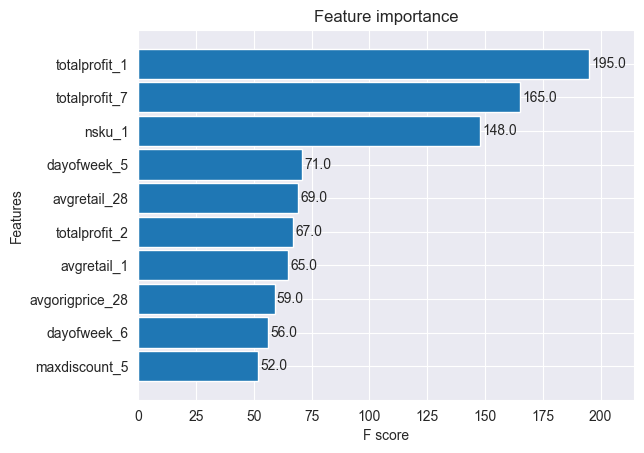

In [328]:
# training on the min-max scaled dataset
import xgboost as xgb
# tune the XGBoost model
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.1,0.01,0.001],
           'n_estimators': [100, 500, 1000],
           }
xgbr = xgb.XGBRegressor(seed = 400)
clf = GridSearchCV(estimator=xgbr,
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1,
                   cv = cv)
clf.fit(X_Train_minmax, y_train,verbose=100)

import xgboost as xgb
reg_tuned = clf.best_estimator_
reg_tuned.fit(X_Train_minmax, y_train,
        eval_set=[(X_Train_minmax, y_train), (X_Test_minmax, y_test)],
        verbose=100)

from xgboost import plot_importance, plot_tree
# get the variable importance of XGboost model
plot_importance(reg_tuned,max_num_features=10,height=0.9)


In [329]:
y_pred = reg_tuned.predict(X_Test_minmax)
# X_Test_standardlized['prediction'] = y_pred
test_pred = pd.concat([X_Test_minmax, X_Train_minmax], sort=False)
show_results(y_test, y_pred)


explained_variance:  0.8412
r2:  0.8326
MAE:  11170.96
MSE:  1321529248.2738
RMSE:  36352.8437


## Losso

In [342]:
# train the regression model
from sklearn.linear_model import LassoCV
from sklearn import linear_model

clf = linear_model.Lasso()
model = LassoCV(alphas=[0.1,0.01,0.05,0.005,0.001], cv=cv, n_jobs=-1)
y_train = pd.DataFrame(y_train)
def inpute_missing_mean(df):
    df = df.copy()
    for i in df.columns[df.isnull().any(axis=0)]:
        df[i].fillna(df[i].mean(),inplace=True)
    return df
X_Train_standardlized_lasso = inpute_missing_mean(X_Train_standardlized)
y_train_lasso = inpute_missing_mean(y_train)
model.fit(X_Train_standardlized_lasso, y_train_lasso)


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41168919957.440155, tolerance: 78969988.25544126
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229299001039.04794, tolerance: 531837790.69023067
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

LassoCV(alphas=[0.1, 0.01, 0.05, 0.005, 0.001],
        cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
        n_jobs=-1)

In [343]:
X_Train_standardlized.shape

(9599, 392)

In [344]:
X_Test_standardlized = inpute_missing_mean(X_Test_standardlized)
y_pred = model.predict(X_Test_standardlized)
show_results(y_test, y_pred)

explained_variance:  0.8972
r2:  0.8717
MAE:  16573.9052
MSE:  1013376013.676
RMSE:  31833.5674
